(-10.0, 10.0)

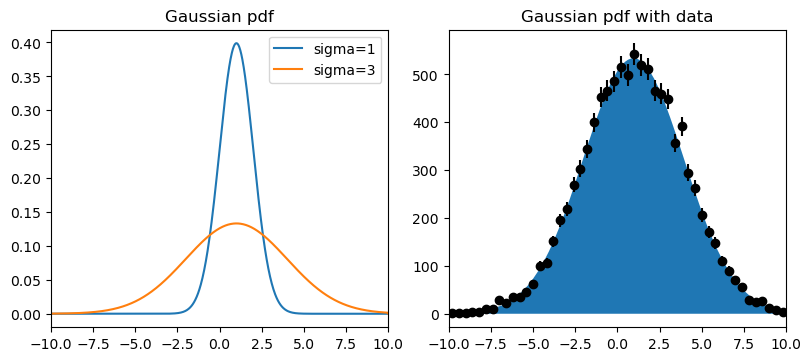

In [3]:
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from numba_stats import truncnorm
from matplotlib import pyplot as plt
import numpy as np

xrange = (-10, 10)


def model(x, mu, sigma):
    return truncnorm.pdf(x, *xrange, mu, sigma)


rng = np.random.default_rng(1)
x = rng.normal(1, 3, size=10000)
x = x[(x > xrange[0]) & (x < xrange[1])]

c = UnbinnedNLL(x, model)
m = Minuit(c, 1, 3)
m.limits["mu"] = (-10, 10)
m.limits["sigma"] = (0.1, 10)
m.migrad()

fig, ax = plt.subplots(1, 2, figsize=(8, 3.5), sharex=True, constrained_layout=True)

plt.sca(ax[0])
plt.title("Gaussian pdf")
xm = np.linspace(*xrange, 1000)
plt.plot(xm, model(xm, 1, 1), label="sigma=1")
plt.plot(xm, model(xm, 1, 3), label="sigma=3")
plt.legend()
plt.xlim(*xrange)

plt.sca(ax[1])
plt.title("Gaussian pdf with data")
m.visualize()
plt.xlim(*xrange)